![Images](Images/ITAcademy.png)
# CIÈNCIA DE DADES: M01.T01
#### Created by: Dani Planas Montserrat


In [2]:

# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import statistics
#Import library MySql
import mysql.connector


# Import Library
from ip2geotools.databases.noncommercial import DbIpCity


warnings.filterwarnings('ignore')


In [3]:
#************************************************************************************
#***************************     READ Files Functions      **************************
#************************************************************************************
#Function for Read *.csv file (Import Data)
def openFileTXT(path_name):
    
    # Read *.csv file (Import Data)
    df = pd.read_csv(path_name, sep='::', names=movie_column_l, encoding = 'ISO-8859-1', index_col=0, engine='python')

    return df

#Function for Read *.txt file (Import Data)
def openFileTable(path_name, file_name, separator, movie_column_l):

    # Read *.txt file (Import Data)
    df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    
    return df

#Function for Read *.parquet file (Import Data)
def openFileParquet(path_name, file_name):
    
    #Import library pyarrow for read files with extenison "parquet" 
    import pyarrow 
    # Read *.txt file (Import Data)
    #df = pd.read_table(path_name + file_name, sep=separator, names=movie_column_l, header=None,  engine='python')
    df = pd.read_parquet(path_name + file_name, engine='pyarrow')
    
    return df




In [4]:
#************************************************************************************
#******************************      PLOT Functions     *****************************
#************************************************************************************
#Function plot, type Histogram (one categoric value)
def plotHistogram(df):
    
    # create a dataset
    height = df
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['green'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Histogram (one Numeric value)
def plotHistogram2(df,paramNum):
    
    # create a dataset
    height = df[paramNum]
    bars = df.index
    x_pos = np.arange(len(bars))

    # Create bars with different colors
    #plt.bar(x_pos, height, color=['black', 'red', 'green', 'blue', 'cyan'])
    plt.bar(x_pos, height, color=['yellow'])
    # Create names on the x-axis
    plt.xticks(x_pos,bars)

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

def plotDensityPlot(df):
    # library & dataset
    import seaborn as sns
    
    # set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
    sns.set(style="darkgrid")

    # plotting both distibutions on the same figure
    fig = sns.kdeplot(df, shade=True, color="r")
    #fig = sns.kdeplot(df[paramNum2], shade=True, color="b")

    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type ScatterPlot
def plotSnsScatterplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.scatterplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()

    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type LinePlot
def plotSnsLineplot(df, paramNum1, paramNum2, title, ylabel, xlabel):

    g = sns.FacetGrid(df)
    g.map(sns.lineplot, paramNum1, paramNum2, alpha=.7)
    g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, with Seaborn Library and type HistPlot
def plotSnsHistplot(df, paramNum1, title, ylabel, xlabel, binsNum):
  
    sns.histplot(data=df, x=paramNum1, bins=binsNum, kde=True)
    #g.add_legend()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    # Show graphic
    fig = plt.gcf()
    plt.show()

    return fig

#Function plot, type Stacked Area Chart (with 3 numeric values and 1 categoric value)   
def plotBarplotMultiple(df, paramNum1, paramNum2, paramNum3, Sel3):
        # libraries
        import numpy as np
        import matplotlib.pyplot as plt

        # width of the bars
        barWidth = 0.3
        
        # Choose the height of the blue bars
        bars1 = df

        if (Sel3 == 2):
            # Choose the height of the cyan bars
            bars2 = df[paramNum2] 

        if (Sel3 == 3):
            # Choose the height of the cyan bars
            bars3 = df[paramNum3] 
        
        # Choose the height of the error bars (bars1)
        yer1 = np.arange(len(bars1))

        # Choose the height of the error bars (bars2)
        yer2 = np.arange(len(bars1))
        
        #print(title) by groups of bars
        title = df.index 
        
        # The x position of bars
        r1 = np.arange(len(bars1))
        r2 = [x + barWidth for x in r1]
        r3 = [x + barWidth for x in r2]

        # Create blue bars
        plt.bar(r1, bars1, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer1, capsize=5, label=paramNum1)
        
        if (Sel3 == 2):
            # Create cyan bars
            plt.bar(r2, bars2, width = barWidth, color = 'yellow', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum2)

        if (Sel3 == 3):
             # Create cyan bars
             plt.bar(r3, bars3, width = barWidth, color = 'green', edgecolor = 'black', yerr=yer2, capsize=7, label=paramNum3)
   
        # general layout
        plt.xticks([r + barWidth for r in range(len(bars1))], title)
        plt.ylabel('height')
        #plt.legend()

        # Show graphic
        fig = plt.gcf()
        plt.show()

        return fig

#Function plot, show a World Map with Geolocation points from a dataset
def plotWorldMapGeolocPoints(df, pLatitud, pLongitud):

        bars3 = df[pLatitud] 

        #Dibujar mapas
        from mpl_toolkits.basemap.test import Basemap
        import matplotlib.pyplot as plt


        #Figure Size
        plt.figure(figsize=(16,12))

        #Projection Type : robin, ortho ...
        my_map=Basemap(projection='robin',lon_0=0,lat_0=0)  #'robin' ,'ortho'

        #Draw cost lines and countries
        my_map.drawcoastlines()
        my_map.drawcountries()

        #Define colours
        my_map.drawcountries(color='#303338')
        my_map.drawmapboundary(fill_color='#c0eaff')
        my_map.drawcoastlines(color='#324c87')
        my_map.fillcontinents(color='#ebe7d5', lake_color='#c0eaff')


        #Place the different locations on the map
        for i in range(len(df[pLongitud])):     
            x,y = my_map(df[pLongitud][i], df[pLatitud][i])
            my_map.plot(x,y, color='g', marker = 'o' , markersize=10 , alpha = 0.9)

        return my_map
    

In [5]:
#************************************************************************************
#***************************     GEOLOCATION Functions     **************************
#************************************************************************************

/#Function that give us information on the location of an IP adress (Country, latitude, altitude,..)
def getInfoGeolocation(x, num):
    

    
    response = DbIpCity.get(x, api_key='free')
    
    #(1) Return Name of country
    if num==1:
        exit = response.country
    #(2) Return Name of country
    if num==2:
        exit = response.latitude
    #(3) Return Name of country
    if num==3:
        exit = response.longitude
   
    #ip = str(dfLogWeb['IP'][1])
    #response = DbIpCity.get(ip, api_key='free')
    #response.ip_address
    #print(response.city)
    #print(response.region)
    #print(response.country)

    #print(response.latitude)
    #print(response.longitude)
    #print(response.to_json())
    return exit



In [6]:
#************************************************************************************
#***************************        SAMPLE Functions       **************************
#************************************************************************************
#Function for doing a Simple Random Sampling from a dataset
def simpleSampling(df, num_sample):
    
    dfSample = df.sample(num_sample)          # Select X sample points from dataset
    return dfSample                           # Return result

# Function for doing a Systematic Sampling from dataset
def systematicSampling(df, start, step):
 
    indexes = np.arange(start, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

# Function for doing a Stratified Sampling from dataset (able for 3 subgroups)
def stratifiedSampling3Group(df, group, subgName1, subgName2, subgName3, samplePercentage):
 
    # STEP1: Divide de Group in subgroups (STRATA)
    group1_df = df.groupby(group)
    group1_df = group1_df.get_group(subgName1)
    nReg_group1 = len(group1_df)
#   print('Regsitros Grupo 1:', nReg_group1)
#   display(group1_df)

    group2_df = df.groupby(group)
    group2_df = group2_df.get_group(subgName2)
    nReg_group2 = len(group2_df)
#   print('Regsitros Grupo 2:', nReg_group2)
#   display(group2_df)

    group3_df = df.groupby(group)
    group3_df = group3_df.get_group(subgName3)
    nReg_group3 = len(group3_df)
#   print('Regsitros Grupo 3:', nReg_group3)
#   display(group3_df)
    
    # STEP 2: get a percentage from each group
    group11_df = group1_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group12_df = group2_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))
    group13_df = group3_df.groupby(group, group_keys=False).apply(lambda x: x.sample(frac=samplePercentage))

    # STEP 3: 
    dfNew = pd.concat([group11_df, group12_df])
    dfNew = pd.concat([dfNew, group13_df])

    return dfNew

# Function for doing a Systematic Sampling from dataset
def reservoirSampling(df, k):
          
    #Import library
    import random
    
    # Create as stream generator
    #stream = dfRunners20['athlete']
    stream = df.index
    # Doing Reservoir Sampling from the stream
    #k=6
    reservoir = []
    for i, element in enumerate(stream):
        if i+1<= k:
            reservoir.append(element)
        else:
            probability = k/(i+1)
            if random.random() < probability:
                # Select item in stream and remove one of the k items already selected
                 reservoir[random.choice(range(0,k))] = element

    print(reservoir)
    print(len(reservoir))

    #Define new dataframe
    df_Sample = pd.DataFrame()

    #Create a New dataframe with values selected from reservoir sampling
    for i in range(len(reservoir)):
        num = reservoir[i]
        df_Sample = df_Sample.append(df.loc[num],ignore_index=True)
        
    return df_Sample

In [7]:
#************************************************************************************
#********************          HIPOTESIS TEST Functions          ********************
#************************************************************************************

In [8]:
##########################################################################
##                 DATA SCIENCE: M05.T02: Exercici 1                    ##
##########################################################################
# Exercici 1: Parteix el conjunt de dades adjunt en train i test. Estudia
# els dos conjunts per separat, a nivell descriptiu.
# També adjunt trobaràs una descripció de les diferents variables del dataset.

path_name = "Data sets\\M05\\"                                        # Define Path name
file_name = "housing data.csv"                                        # Define File name
separator = ','                                                       # Define type of char between columns  
movie_column_l = ['CRIM', 'ZN', 'INDUS','CHAS', 'NOX', 'RM', 'AGE',
                  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 
                  'MEDV']                                             # Define name of columns

df = openFileTable(path_name, file_name, separator, movie_column_l)   # Function to open File


print ("Taula de viendes de Houston: ")                               # Print Message
display(df)                                                           # Display datset imported

print ("Leyenda:")

print ("    1. CRIM:      per capita crime rate by town")
print ("    2. ZN:        proportion of residential land zoned for lots over 25,000 sq.ft.")
print ("    3. INDUS:     proportion of non-retail business acres per town")
print ("    4. CHAS:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)")
print ("    5. NOX:       nitric oxides concentration (parts per 10 million)")
print ("    6. RM:        average number of rooms per dwelling")
print ("    7. AGE:       proportion of owner-occupied units built prior to 1940")
print ("    8. DIS:       weighted distances to five Boston employment centres")
print ("    9. RAD:       index of accessibility to radial highways")
print ("    10. TAX:      full-value property-tax rate per $10,000")
print ("    11. PTRATIO:  pupil-teacher ratio by town")
print ("    12. B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town")
print ("    13. LSTAT:    % lower status of the population")
print ("    14. MEDV:     Median value of owner-occupied homes in $1000's")


Taula de viendes de Houston: 


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Leyenda:
    1. CRIM:      per capita crime rate by town
    2. ZN:        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS:     proportion of non-retail business acres per town
    4. CHAS:      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX:       nitric oxides concentration (parts per 10 million)
    6. RM:        average number of rooms per dwelling
    7. AGE:       proportion of owner-occupied units built prior to 1940
    8. DIS:       weighted distances to five Boston employment centres
    9. RAD:       index of accessibility to radial highways
    10. TAX:      full-value property-tax rate per $10,000
    11. PTRATIO:  pupil-teacher ratio by town
    12. B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT:    % lower status of the population
    14. MEDV:     Median value of owner-occupied homes in $1000's


In [9]:

# split a dataset into train and test sets
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# split into train test sets, apply 33% to test and 67% to train
train, test = train_test_split(df, test_size=0.33)
display(train)
display(test)




,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
232,0.57529,0.0,6.20,0,0.507,8.337,73.3,3.8384,8,307.0,17.4,385.91,2.47,41.7
157,1.22358,0.0,19.58,0,0.605,6.943,97.4,1.8773,5,403.0,14.7,363.43,4.59,41.3
288,0.04590,52.5,5.32,0,0.405,6.315,45.6,7.3172,6,293.0,16.6,396.90,7.60,22.3
264,0.55007,20.0,3.97,0,0.647,7.206,91.6,1.9301,5,264.0,13.0,387.89,8.10,36.5
367,13.52220,0.0,18.10,0,0.631,3.863,100.0,1.5106,24,666.0,20.2,131.42,13.33,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,0.29819,0.0,6.20,0,0.504,7.686,17.0,3.3751,8,307.0,17.4,377.51,3.92,46.7
467,4.42228,0.0,18.10,0,0.584,6.003,94.5,2.5403,24,666.0,20.2,331.29,21.32,19.1
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
243,0.12757,30.0,4.93,0,0.428,6.393,7.8,7.0355,6,300.0,16.6,374.71,5.19,23.7


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
313,0.26938,0.0,9.90,0,0.544,6.266,82.8,3.2628,4,304.0,18.4,393.39,7.90,21.6
261,0.53412,20.0,3.97,0,0.647,7.520,89.4,2.1398,5,264.0,13.0,388.37,7.26,43.1
395,8.71675,0.0,18.10,0,0.693,6.471,98.8,1.7257,24,666.0,20.2,391.98,17.12,13.1
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05,9.6
180,0.06588,0.0,2.46,0,0.488,7.765,83.3,2.7410,3,193.0,17.8,395.56,7.56,39.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,2.92400,0.0,19.58,0,0.605,6.101,93.0,2.2834,5,403.0,14.7,240.16,9.81,25.0
266,0.78570,20.0,3.97,0,0.647,7.014,84.6,2.1329,5,264.0,13.0,384.07,14.79,30.7
380,88.97620,0.0,18.10,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,10.4
118,0.13058,0.0,10.01,0,0.547,5.872,73.1,2.4775,6,432.0,17.8,338.63,15.37,20.4


<span style=color:green><b>PROCESO DIVISIÓN TRAIN TEST</u></b></span> 


La divisió "Train-Test" és una tècnica per evaluar el rendiment d'un algoritme d'aprenentatge automàtic.

Es pot utilitzar per problemes de classficació o regresió i es pot utiltzar per qualsevol algoritme d'aprenentatge supervisat.

El procediment consisteix en agafar un conjunt de dades i dividir-lo en dos subconjunts. El primer s'utilitza per ajustar el model i es coneix com al conjunt d'entrenament. El segon subconjunt s'utilitza per fer prediccions i es compara amb els valors esperats, aquest segon subconjunt es coneix com el conjunt de dades de prova.

In [17]:
##########################################################################
##                 DATA SCIENCE: M05.T02: Exercici 2                    ##
##########################################################################
# Exercici 2: Aplica algun procés de transformació (estandarditzar les 
# dades numèriques, crear columnes dummies, polinomis...).


# standarization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(train)
standardized_X = scaler.transform(train)
standardized_X_test = scaler.transform(test)
display(standardized_X)
display(standardized_X_test)




array([[-0.36197173, -0.49305115, -0.68605017, ...,  0.31740828,
        -1.42594562,  2.1103154 ],
       [-0.27385388, -0.49305115,  1.25153471, ...,  0.07224618,
        -1.12789349,  2.06628894],
       [-0.43392827,  1.83702792, -0.81348475, ...,  0.43726288,
        -0.7047157 , -0.02496781],
       ...,
       [-0.40966864, -0.49305115, -0.1806562 , ...,  0.43726288,
         0.24145922, -0.6303316 ],
       [-0.4228274 ,  0.83842261, -0.86996144, ...,  0.19526346,
        -1.04353912,  0.1291248 ],
       [ 2.28984281, -0.49305115,  1.03721292, ..., -0.77404292,
         2.53308644, -1.51086076]])

array([[-0.40355209, -0.49305115, -0.15024568, ...,  0.39898357,
        -0.66253852, -0.10201411],
       [-0.3675677 ,  0.39459802, -1.00898098, ...,  0.34423651,
        -0.75251652,  2.264408  ],
       [ 0.74464404, -0.49305115,  1.03721292, ...,  0.38360641,
         0.63370707, -1.03757634],
       ...,
       [11.65378965, -0.49305115,  1.03721292, ...,  0.43726288,
         0.64636022, -1.33475493],
       [-0.42241827, -0.49305115, -0.13431636, ..., -0.19821735,
         0.38767347, -0.23409348],
       [ 0.56119624, -0.49305115,  1.03721292, ..., -2.83632732,
         1.25230583, -1.26871524]])

In [15]:
#get dummy varibles
df_dummy = pd.get_dummies(df["RAD"], prefix = "RAD")
#conncat the dummy columns with dataframe columns

df = pd.concat([df, df_dummy], axis=1)
display(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RAD_24,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,...,0,1,0,0,0,0,0,0,0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,...,0,0,1,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,...,0,0,1,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,...,0,0,0,1,0,0,0,0,0,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,...,0,1,0,0,0,0,0,0,0,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,...,0,1,0,0,0,0,0,0,0,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,...,0,1,0,0,0,0,0,0,0,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
#Generating Polynminal Features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
poly.fit_transform(df) 

array([[1.0000e+00, 6.3200e-03, 1.8000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 2.7310e-02, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 2.7290e-02, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 6.0760e-02, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.0959e-01, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 4.7410e-02, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [ ]:
#get dummy varibles
df_Norm = pd.get_dummies(df["CRIM"], prefix = "CRIM")
#conncat the dummy columns with dataframe columns

df = pd.concat([df, df_Norm], axis=1)
display(df)

In [26]:
##########################################################################
##                 DATA SCIENCE: M05.T02: Exercici 3                    ##
##########################################################################
# Exercici 3: Resumeix les noves columnes generades de manera estadística i gràfica

#Statics from Dataframe
df.describe()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,...,RAD_24,RAD_1,RAD_2,RAD_3,RAD_4,RAD_5,RAD_6,RAD_7,RAD_8,RAD_24
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,...,0.260870,0.039526,0.047431,0.075099,0.217391,0.227273,0.051383,0.033597,0.047431,0.260870
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,...,0.439543,0.195035,0.212769,0.263812,0.412879,0.419485,0.220997,0.180367,0.212769,0.439543
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(*) Gràfica Dataframe del paràmetre CRIM (per capita crime rate by town)


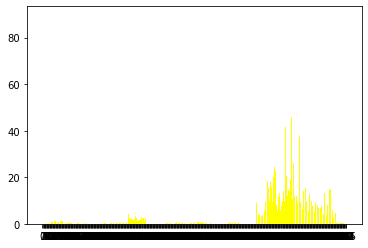

(*) Gràfica Dataframe TRAIN del paràmetre CRIM (per capita crime rate by town)


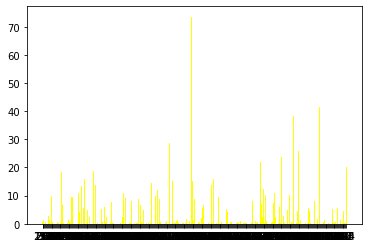

(*) Gràfica Dataframe TRAIN del paràmetre CRIM (per capita crime rate by town)


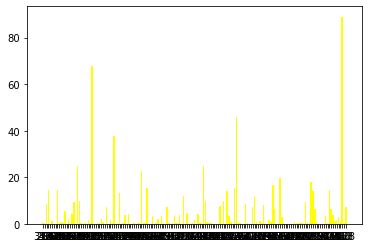

In [31]:
print ("(*) Gràfica Dataframe del paràmetre CRIM (per capita crime rate by town)")                  #Print message
fig1 = plotHistogram2(df, 'CRIM')                                           #Call Function create plot
#saveImage(fig1,'Images/Image_Result_14.png')                               #Save Image

print ("(*) Gràfica Dataframe TRAIN del paràmetre CRIM (per capita crime rate by town)")               #Print message
fig1 = plotHistogram2(train, 'CRIM')                                        #Call Function create plot
#saveImage(fig1,'Images/Image_Result_14.png')                               #Save Image  

print ("(*) Gràfica Dataframe TRAIN del paràmetre CRIM (per capita crime rate by town)")               #Print message
fig1 = plotHistogram2(test, 'CRIM')                                         #Call Function create plot
#saveImage(fig1,'Images/Image_Result_14.png')                               #Save Image     #Call Function create plot

